## Bibliotecas

In [57]:
import numpy as np
import pandas as pd
import functions
import matplotlib.pyplot as plt
import seaborn as sns

# Summary K-S:

#### 1. Data ( Experiment )
#### 2. ECDF - Empirical Cumulative Distribution Function
```python

'''Cálcular a ecdf dos dados Experimentais'''
''' Receive an array and compute x,y to plot '''
'''The ECDF is defined as ECDF(x) = (number of samples ≤ x) / (total number of samples)'''

def ecdf(data):
    
    import numpy as np
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/ n

    return x, y

```

#### 3. Data 2 -  Samples from theorical distribution you are comparing your data to.

```python
''' Example for exponential distribution '''

np.random.exponential(mean = 60, size=10000)

```


#### 4. Formal ECDF using data at arbitrary points.



```python
'''ecdf_formal(x,data) returns value of the formal ecdf derived from dataset (data) for each value in array x (ecdf dos dados experimentais) .'''

'''https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html'''

'''Sort data from theorical sample(data2), and using observation np.search sorted will create and array with best localization for theorical sample'''

'''x value (observations sorted) is used for ecdf and ecdf_formal(theorical in arbitrary point)'''

''' after create an array with values close to observation it's normalized /len(data2), now we have an theorical ecdf in specific point '''



def ecdf_formal(x, data2):  
    return np.searchsorted(np.sort(data2), x, side='right') / len(data2)

```

#### 5. Computing the K-S statistic:

```python

'''Receives and data1 and data2(theorical) and calculates ecdf and cdf_formal returning K-S statistics'''

''' Now that you have ecdf from observation and theorical ecdf from theorical sample, let's compute the distances and use the max distance as K-S.'''

'''Write a function to compute the Kolmogorov-Smirnov statistic from two datasets, data1 and data2, 
in which data2 consists of samples from the theoretical distribution you are comparing your data to. 
Note that this means we are using hacker stats to compute the K-S statistic for a dataset and a theoretical distribution, 
not the K-S statistic for two empirical datasets.'''


def ks_stat(data1, data2): # data2 consists of samples from the theoretical distribution you are comparing your data to
    # Compute ECDF from data: x, y
    x,y = ecdf(data1)
    
    # Calcula os valores correspondes da ecdf na cdf simulada
    cdf = ecdf_formal(x,data2)

    # Compute distances between concave corners and CDF
    D_top = cdf-y

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))

```

#### 6. Drawing K-S replicates:

```python

'''Here, n is the number of data points, and f is the function you will use to generate samples from the target CDF. For example, to test against an Exponential distribution, you would pass np.random.exponential as f. This function usually takes arguments, which must be passed as a tuple. So, if you wanted to take samples from an Exponential distribution with mean x_mean, you would use the args=(x_mean,) keyword. The keyword arguments size and n_reps respectively represent the number of samples to take from the target distribution and the number of replicates to draw.'''

''' 
n = size of samples that will be compared with theorical sample, use same size as yours observations 
f = function used to be compared (theorical). Ex: np.random.exponential()
args() = contain the parameters that i want to replicate for theorical function. Ex: mean
size = size of theorical sample from f
n_reps = how many times you want to replicate experiment that will calculate k-s comparing x_samp with theorical sample x_f
'''

def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args,size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicate, according with number of copies that i want
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args,size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp,x_f)

    return reps

```

#### 7. Validation - p-value:

```python
# Draw target distribution: x_f
data2 = np.random.exponential(np.mean(data),size=10000)
# Compute K-S stat: d
d = ks_stat(data,data2)

# Draw K-S replicates: reps - array containing simulated distances theorical x theorical n times
reps = draw_ks_reps(len(data), np.random.exponential, 
                         args=(np.mean(data),), size=10000, n_reps=10000)

# Compute and print p-value
p_val = sum(reps >= d) / 10000
print('p =', p_val)
```

# Análise

## 1. Dados: Anos Entre Erupções

In [20]:
eruption_years = np.array([79,172, 203, 222,303, 379, 472, 512, 536, 685, 787,860,900, 968, 991, 999, 1006, 1037, 1049,1073, 1139, 1150,1270, 1347, 1500, 1631,1872,1906, 1929,1944])

In [21]:
data = np.diff(eruption_years)

data = np.array([ 93,  31,  19,  81,  76,  93,  40,  24, 149, 102,  73,  40,  68,
        23,   8,   7,  31,  12,  24,  66,  11, 120,  77, 153, 131, 241,
        34,  23,  15])

## 1. Dados: Statistics

In [91]:
pd.DataFrame(data).describe(percentiles=[0.25,0.50,0.75,0.8,0.9,0.95,0.98,0.99])

,0
count,29.000000
mean,64.310345
std,55.110994
min,7.000000
25%,23.000000
50%,40.000000
75%,93.000000
80%,96.600000
90%,134.600000
95%,151.400000


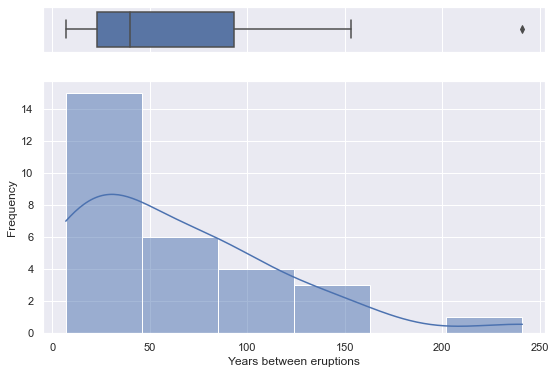

In [52]:
sns.set(rc={'figure.figsize':(9,6)})
sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=data, ax=ax_box)
_ = sns.histplot(data,kde=True,ax=ax_hist)
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Years between eruptions')
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

## 2. ECDF - Empirical Cumulative Distribution Function

### 2.1 Function :

In [24]:
''' Receive an array and compute x,y to plot '''

def ecdf(data):
    
    import numpy as np
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    # Organizing data observed in a sorted way
    
    x = np.sort(data)

    # y-data for the ECDF: y
    # Giving data observed: create a array normalized (0-1) that will contain observations
    
    y = np.arange(1, n+1)/ n
    
    # ! Important that x,y will have same sizes

    return x, y

### 2.2 Calculation :

In [25]:
x,y = ecdf(data)

In [26]:
x,y

(array([  7,   8,  11,  12,  15,  19,  23,  23,  24,  24,  31,  31,  34,
         40,  40,  66,  68,  73,  76,  77,  81,  93,  93, 102, 120, 131,
        149, 153, 241]),
 array([0.03448276, 0.06896552, 0.10344828, 0.13793103, 0.17241379,
        0.20689655, 0.24137931, 0.27586207, 0.31034483, 0.34482759,
        0.37931034, 0.4137931 , 0.44827586, 0.48275862, 0.51724138,
        0.55172414, 0.5862069 , 0.62068966, 0.65517241, 0.68965517,
        0.72413793, 0.75862069, 0.79310345, 0.82758621, 0.86206897,
        0.89655172, 0.93103448, 0.96551724, 1.        ]))

### 2.3 Plot :

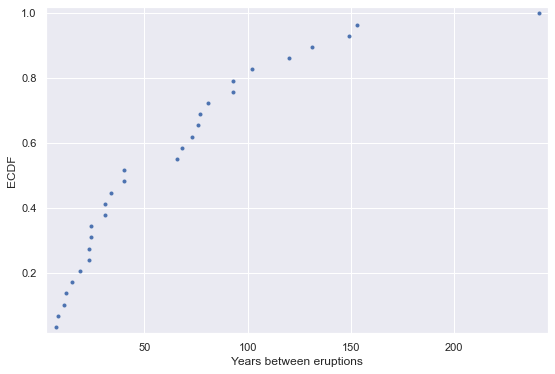

In [27]:
sns.set(rc={'figure.figsize':(9,6)})
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Years between eruptions')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

## 3. Data 2 - Samples from theorical distribution you are comparing your data to

In [28]:
''' Create a theorical sample of exponential data distribution using scale(mean) as values from observed sample (from data observed)'''

data2 = np.random.exponential(scale= np.mean(data), size=10000)

In [29]:
data2

array([ 87.0541208 ,  59.66274631,  69.9789015 , ...,  82.47424143,
        88.36290986, 207.9357762 ])

In [30]:
print('Low and High from theorical sample: ')
print('Min :',round(min(data2)),'Max :',round(max(data2)))

Low and High from theorical sample: 
Min : 0 Max : 555


## 4. Formal ECDF - using data at arbitrary points

### 4.1 Function :

In [31]:
'''ecdf_formal(x,data) returns value of the formal ecdf derived from dataset (data) for each value in array x (ecdf dos dados experimentais) .'''

'''https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html'''

'''Sort data from theorical sample(data2), and using observation np.search sorted will create and array with best localization for theorical sample'''

'''x value (observations sorted) is used for ecdf and ecdf_formal(theorical in arbitrary point)'''

''' after create an array with values close to observation it's normalized /len(data2), now we have an theorical ecdf in specific point '''

def ecdf_formal(x, data2):  
    return np.searchsorted(np.sort(data2), x, side='right') / len(data2)


### 4.2 Calculation :

In [32]:
# use x from x,y = ecdf(data) to ecdf_formal create arbitrary points.

theorical_y = ecdf_formal(x, data2)

In [33]:
len(theorical_y)

29

### 4.3 Plot :

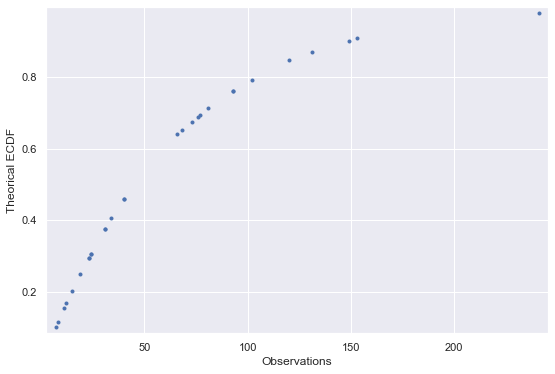

In [34]:
_ = plt.plot(x,theorical_y,marker='.',linestyle='none')
_ = plt.xlabel('Observations')
_ = plt.ylabel('Theorical ECDF')
plt.margins(0.02)
plt.show()

## 5. Computing the K-S statistic:

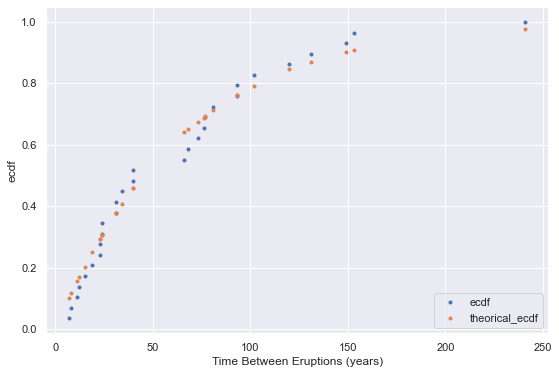

In [35]:
# Plot the CDFs and show the plot
# x- same for both
#y- probability came from observations
#- probability came from observations

_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.plot(x,theorical_y, marker='.', linestyle='none')
_ = plt.legend(('ecdf', 'theorical_ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('ecdf')
plt.show()

### 5.1 Function :

In [36]:
'''Write a function to compute the Kolmogorov-Smirnov statistic from two datasets, data1 and data2, 
in which data2 consists of samples from the theoretical distribution you are comparing your data to. 
Note that this means we are using hacker stats to compute the K-S statistic for a dataset and a theoretical distribution, 
not the K-S statistic for two empirical datasets.'''


def ks_stat(data1, data2): # data2 consists of samples from the theoretical distribution you are comparing your data to
    # Compute ECDF from data: x, y
    x,y = ecdf(data1)
    
    # Calcula os valores correspondes da ecdf na cdf simulada
    cdf = ecdf_formal(x,data2)

    # Compute distances between concave corners and CDF
    D_top = y-cdf

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))

NameError: name 'D_bottom' is not defined

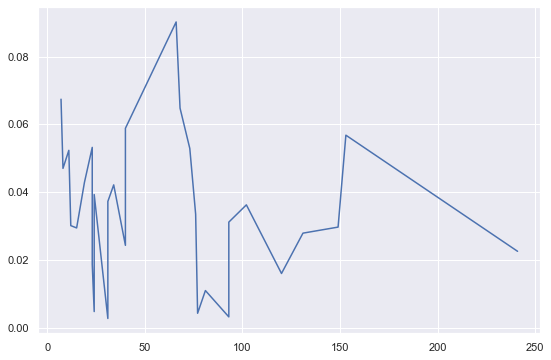

In [38]:
_ = plt.plot(x,np.absolute(theorical_y-y))
_ = plt.plot(x,D_bottom)
_ = plt.plot(x,D_top)
_ = plt.legend(('absolute,D_bottom,D_top'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('ecdf')
plt.show()

***''' Not conclude why use the D_bottom  - y + 1/len(data1) but this bring highest distance and more chance to refuse Ho so let's use that for while '''***

In [39]:
k_s = ks_stat(data, data2)
k_s

0.1246586206896552

### 6. Drawing K-S replicates:

In [40]:
''' 
n = size of samples that will be compared with theorical sample
f = function used to be compared (theorical). Ex: np.random.exponential()
args() = contain the parameters that i want to replicate for theorical function. Ex: mean
size = size of theorical sample from f
n_reps = how many times you want to replicate experiment that will calculate k-s comparing x_samp with theorical sample x_f

'''


def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args,size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicate, according with number of copies that i want
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args,size=n)
        
        # Compute K-S statistic
        reps[i] = ks_stat(x_samp,x_f)

    return reps

In [41]:
# n = 29 same size of our observations to follow we did in ks_stat;
#f = function that we will use ( Exponential )
# args = we pass Mean from observed interval of eruptions (data)
# size of theorical distribution that we will compare our samples 1000
#n_reps = how many times we will run the experiment ? 10000

draw_ks_reps(n=29, f= np.random.exponential, args=(np.mean(data),), size=10000, n_reps=10000)

array([0.1301069 , 0.27798966, 0.21043448, ..., 0.22868966, 0.26532069,
       0.14636207])

### 7. Calculate Probability of K-S_reps >= K-S observed and get p-value

In [42]:
# Draw target distribution: x_f
x_f = np.random.exponential(np.mean(data),size=10000)
# Compute K-S stat: d
d = ks_stat(data,x_f)

# Draw K-S replicates: reps - array containing simulated distances theorical x theorical n times
reps = draw_ks_reps(len(data), np.random.exponential, 
                         args=(np.mean(data),), size=10000, n_reps=10000)

# Compute and print p-value
p_val = sum(reps >= d) / 10000
print('p =', p_val)

p = 0.7989


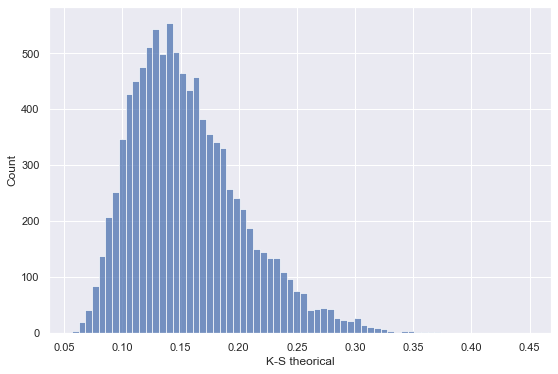

In [46]:
_ = sns.histplot(reps)
_= plt.xlabel('K-S theorical')

# Scipy comparason

In [47]:
import scipy.stats

In [48]:
scipy.stats.kstest(y,theorical_y)

KstestResult(statistic=0.10344827586206896, pvalue=0.9984782925008956)

# Probabilities

In [50]:
from scipy.stats import expon

## With Numpy

In [54]:
func = np.random.exponential(np.mean(data),size=100000)

In [59]:
x,y = ecdf(func)

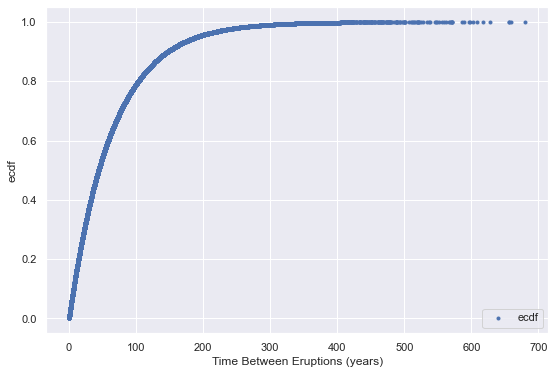

In [65]:
# Plot the CDFs and show the plot
# x- same for both
#y- probability came from observations
#- probability came from observations

_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.legend(('ecdf', 'theorical_ecdf'), loc='lower right')
_ = plt.xlabel('Time Between Eruptions (years)')
_ = plt.ylabel('ecdf')
plt.show()

In [66]:
2022-1944

78

In [76]:
# Acumulado de termos uma erupção desde 1944 até fim de 2022 ?

sum(func<79)/len(func)

0.70838

In [78]:
sum(func<77)/len(func) 

0.69939

Probability that eruptions occurrs in 2022 ?

In [80]:
(0.70838-0.69939)*100

0.8990000000000054

Probability to occurr next 10 years

In [96]:
((sum(func<88)/len(func))-(sum(func<78)/len(func)))*100

4.244000000000003

In [90]:
pd.DataFrame(func).describe(percentiles=[0.25,0.50,0.75,0.8,0.9,0.95,0.98,0.99])

,0
count,100000.000000
mean,64.075903
std,64.270790
min,0.000535
25%,18.427616
50%,44.082896
75%,88.981897
80%,103.436242
90%,147.436943
95%,191.066004


In [ ]:
The cumulative probability will reach 80 % in 2047 and 90% 2194 according with exponential distribution 